# Espoir BADOHOUN Yacine IDIR

# UE : Analyse de données Massives

# Projet : l’ensemble des transactions sur les horodateurs dans la ville de Paris sur l’année 2014

Dans le cadre de notre analyse on a de deux collections d'une part : Les Transactions : c'est à dire l'ensemble des paiements réalisés et d'autre part les mobiliers :L'ensemble des horodateurs .

# Introduction

Dans le cadre de ce mini projet on utilise tous les outils vus lors de cet UE en l'occurence les statistiques, la  visualisation  avec le langage  python  et notamment dans une perspective d'analyse de données massives .

Nous explorons  les pistes suivantes dans le cadre de notre projet : l'ensemble des modèles existants d’horodateurs,
le type d'alimentation des horodateurs et le croisement   régime  et  arrondissements , la meme analyse avec le tarif horaire
Le nombre horodateurs pour chaque arrondissement ,les transactions par arrondissement le lien entre le moyen d’alimentation d’un horodateur et le lieu ou il se situe , Les moyens de paiements dans le cadre des transactions ,les temps de stationnements, les durées payées.




# Importation des modules  nécessaires dans notre projet 

On utilisera dans ce projet les modules suivants : pymongo, pandas, pprint, seaborn , json ,folium et datetime. 

In [1]:
import pymongo
import pandas
from pprint import pprint
import seaborn
%matplotlib inline
from datetime import datetime
import folium
import json

# Utilisation génerale

La première opération consite à créer une connexion entre python et MongoDB en utilisant la fonction MongoClient(). Celle-ci prend en paramètre l'adresse du serveur (IP et port). La commande ci-après permet donc de se connecter au serveur . Par le biais de l'objet ainsi créé (con); on a accès à la liste des bases de données présentes, Nous allons nous interesser uniquement dans le cadre de notre projet à la base horodateurs . On crée un connecteur directement à cette base. Premièrement on liste les contenants de cette base en verifiant qu'il s'agit bien des collections , transactions et mobiliers . Ensuite on effectue les opérations classiques pour comprendre la base de données comme : Comptage du nombre de transactions effectuées ; Comptage du nombre de mobilier . 

# Connexion entre Python - MongoDB et opérations classiques sur la base de données horodateurs

In [2]:
# Creation de la connexion entre python  et mongoDb
con = pymongo.MongoClient("mongodb://193.51.82.104:2343/")
# les elements de la base de donnees (transactions small, transactions et les mobiliers)
horo = con.horodateurs
nom_collec=horo.collection_names()
#  Total de transactions effectués sur l'année
taille_trans=horo.transactions.count() # echantillons total
taille_trans_red=horo.transactions_small.count() # echantillons reduit
# Total de  mobiliers sur l'année 
taille_mob=horo.mobiliers.count()

# Contenue des collections présentes dans la base de données horodateurs

In [3]:
#  premier élement de chaque collection afin d'avoir une idée des élements de cette collection 
# La Premiere transaction
pprint(horo.transactions.find_one())

# La collection transactions contient les informations suivantes: 
# la date de la transaction,
# la durée de stationnement payée, 
# le debut et la fin de stationnement, 
# le montant payé, le numero horodateur
# le moyen de paiement ainsi que l'usager 

{'_id': ObjectId('56eaa8279fae0d71f77ea2bd'),
 'date horodateur': datetime.datetime(2014, 1, 9, 14, 9, 47),
 'durée payée (h)': 0.5,
 'début stationnement': datetime.datetime(2014, 1, 9, 14, 9, 47),
 'fin stationnement': datetime.datetime(2014, 1, 9, 14, 39, 47),
 'horodateur': 1050,
 'montant carte': 1.8,
 'moyen de paiement': 'Paris Carte',
 'usager': 'Rotatif'}


In [4]:
#  mobilier en première place 
pprint(horo.mobiliers.find_one())
# On constate que la collection mobilier contient les informations suivantes:
# le genre d'alimentation utilisé, l'arrondissement ou il se situe,
## la géolocalisation de chaque horodateur
## le modele et le numero de chaque horodateur
## l'object, le regime et  le lieu de residence de chaque horodateur 

{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
 'datasetid': 'horodateurs-mobiliers',
 'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
            'alim': 'SOLAIRE',
            'arrondt': 8,
            'geo_point_2d': [48.877489999731374, 2.311394999713242],
            'geo_shape': {'coordinates': [2.311394999713242,
                                          48.877489999731374],
                          'type': 'Point'},
            'modele': 'SAB3',
            'numhoro': 57080603,
            'objectid': 4383,
            'regime': 'MIX',
            'tarif': '4,00 E MIX 2U',
            'tarifhor': 4.0,
            'zoneres': '8J'},
 'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
              'type': 'Point'},
 'record_timestamp': '2015-12-02T17:49:46+00:00',
 'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c'}


# Analyse proprement dite 


Premièrement on effectue une analyse exploratoire : la collections mobiliers avec les differents types de modeles d'horodateurs, leurs genres d’alimentations, leurs regimes et leurs repartitions en ce qui concerne les arrondissements. On etudie ensuite le lien existant ou pas entre le genre d’alimentation d’un horodateur et son lieu de residence (arrondissement) ou son type de modele; Enfin on croise le genre d’alimentation avec le type de modele et le lieu de residence. 

# L'ensemble des modèles existants d’horodateurs


In [5]:
res = list(horo.mobiliers.aggregate([
{ "$group" : { "_id" : "$fields.modele", "nb" : { "$sum" : 1}}}
]))
pprint(res)
# Creation d'un  Tableau type dataframe contenant les modeles  avec leurs effectifs 
df = pandas.DataFrame(res)
df.columns = ["modele", "effectif"]
df


# on a  donc 3   modèles  d'horodateurs qui sont organisés de la façon suivante  :
#  2995 des modeles  SMB2,  3 des modeles  MUI , 4811 sont des modeles  SAB3
# On a ici  1 modele d'horodateur qui n'est pas connue .

[{'_id': None, 'nb': 1},
 {'_id': 'SMB2', 'nb': 2995},
 {'_id': 'MUI', 'nb': 3},
 {'_id': 'SAB3', 'nb': 4811}]


modele  effectif
0   None         1
1   SMB2      2995
2    MUI         3
3   SAB3      4811

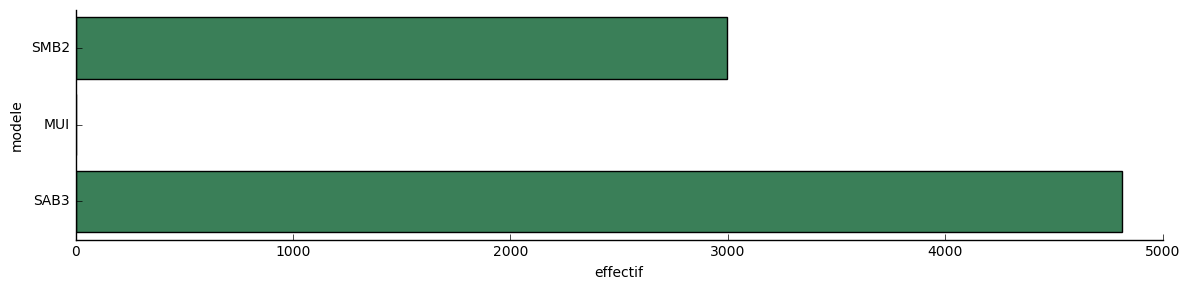

In [6]:
seaborn.factorplot(y = "modele", x = "effectif", color = "seagreen",
                   data = df, kind = "bar", size = 3, aspect = 4)

# Le type d'alimentation des horodateurs


[{'_id': None, 'nb': 8},
 {'_id': 'PILE', 'nb': 2994},
 {'_id': 'SOLAIRE', 'nb': 4808}]


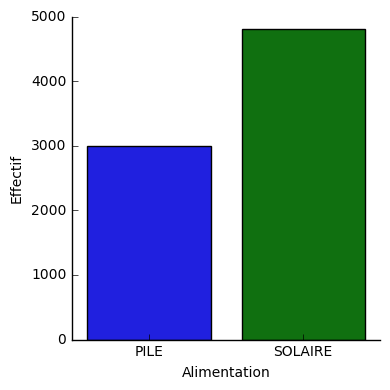

In [7]:
res = list(horo.mobiliers.aggregate([
{ "$group" : { "_id" : "$fields.alim", "nb" : { "$sum" : 1}}}

]))
pprint(res)
# Creation d'un dataframe contenant le type de moyen d'alimentation et les effectifs correspondant
df = pandas.DataFrame(res)
df.columns = ["Alimentation", "Effectif"]
df
# On dispose ici de  2 types d'alimentations: alimentation solaire et alimentation à la pile
# 4808 horodateurs fonctionnent au solaire dans le meme temps 2994 horodateurs fonctionnent au pile
# 8 horodateurs ne fonctionnent ni au pile ni au solaire
# On utilise la visualisation sous python pour  representer sous formes de graphiques les differences
## entre les alimentations et les effectifs .
## On utilise ici le module  seaborn 
seaborn.factorplot(x = "Alimentation", y = "Effectif", data = df, kind = "bar")


#  Croiser le régime (regime) et les arrondissements pour voir s'il y a des différences notables

In [8]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "reg" : "$fields.regime", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
    { "$project": { "regime" : "$_id.reg", "arrondissement" : "$_id.arr", "effectif" : "$nb" }},
    { "$sort" : { "arrondissement" : 1}}
]))
df = pandas.DataFrame(res).drop("_id", 1)
df.head()

arrondissement  effectif regime
0               1        24    ROT
1               1        63    MIX
2               2        18    ROT
3               2        49    MIX
4               3        82    MIX

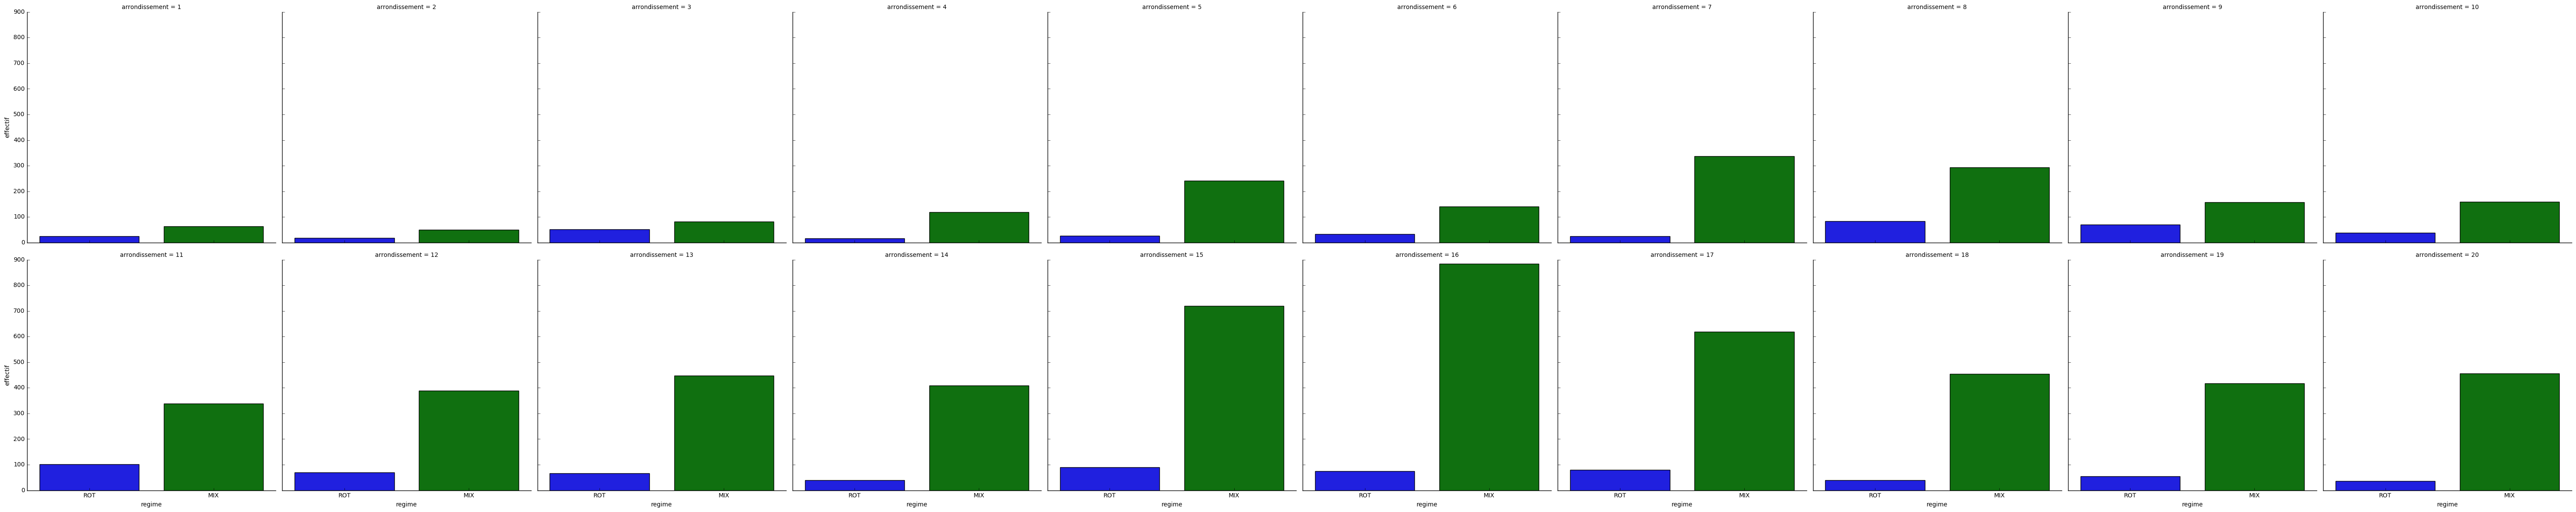

In [9]:
seaborn.factorplot(x = "regime", y = "effectif",
                   col = "arrondissement", col_wrap = 10,
                   data = df, kind = "bar", size = 6)

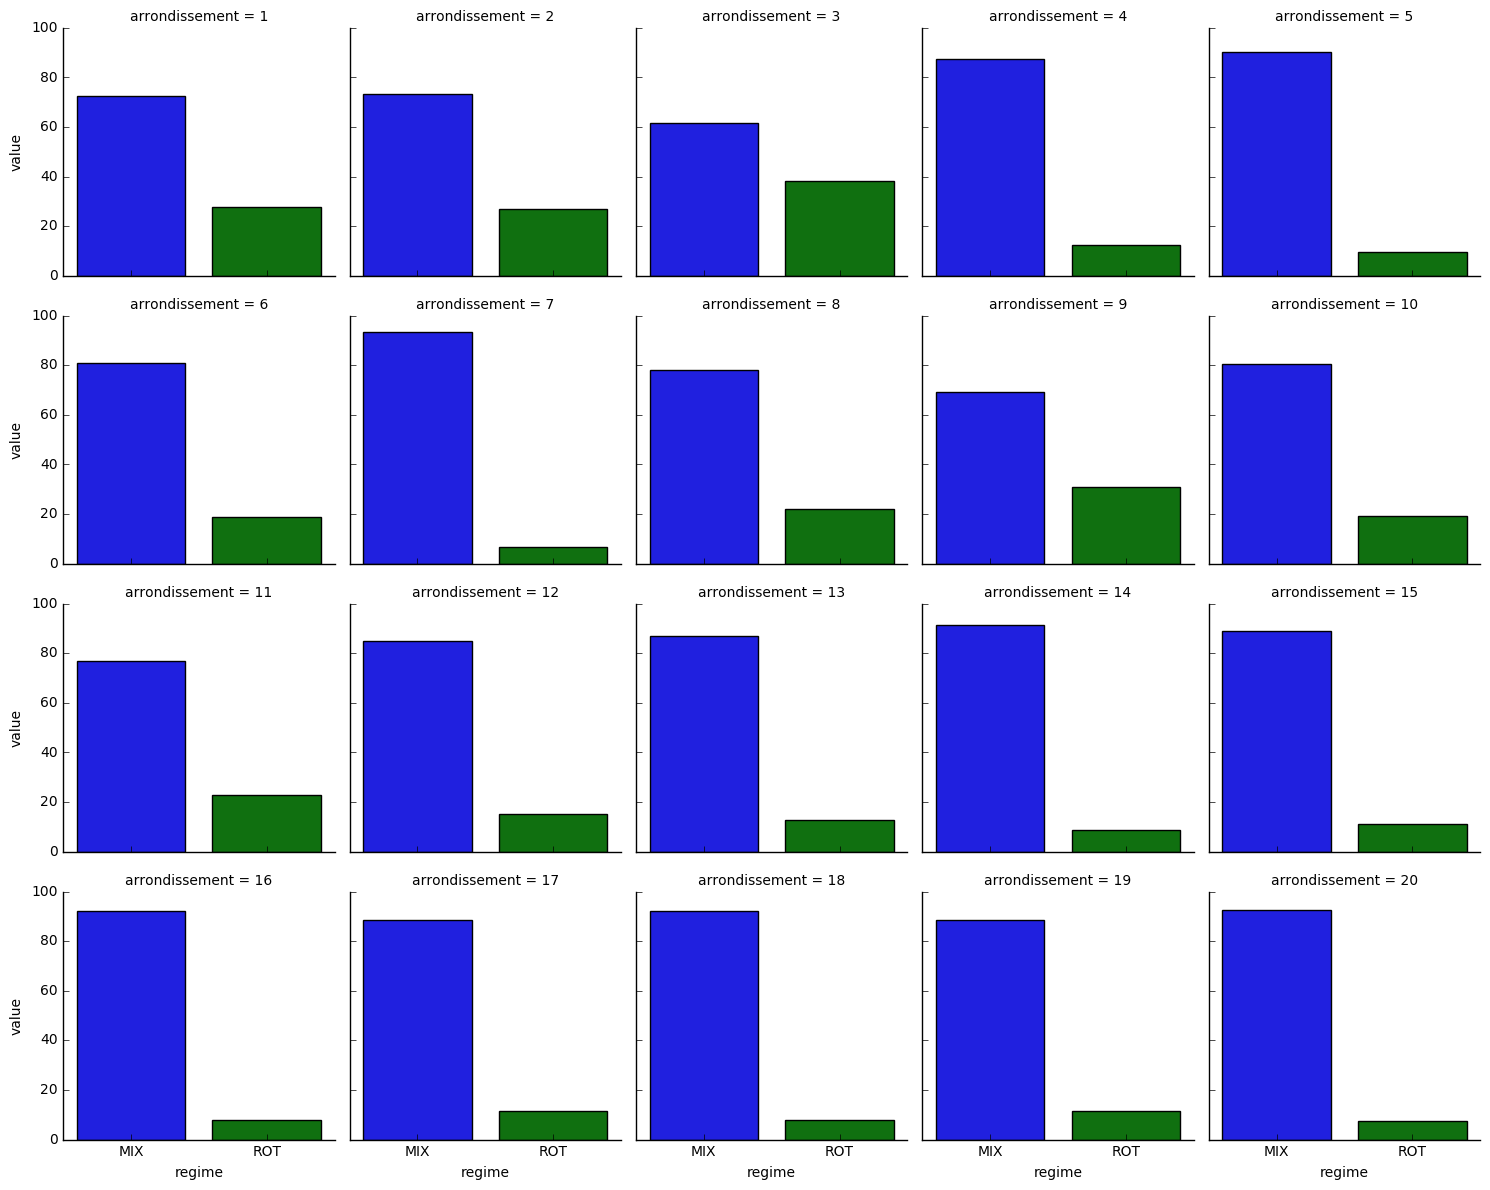

In [10]:
t = pandas.crosstab(df.regime, df.arrondissement, df.effectif, normalize = "columns", aggfunc = sum)
t = t.assign(regime = t.index)
tm = pandas.melt(t, id_vars = "regime")
tm = tm.assign(value = 100 * tm.value)

seaborn.factorplot(x = "regime", y = "value", 
                   col = "arrondissement", col_wrap = 5, 
                   data = tm, kind = "bar", size = 3)

# Meme analyse  avec le tarif horaire 

In [11]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "tar" : "$fields.tarifhor", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
    { "$project": { "tarif" : "$_id.tar", "arrondissement" : "$_id.arr", "effectif" : "$nb" }},
    { "$sort" : { "arrondissement" : 1}}
]))
df = pandas.DataFrame(res).drop("_id", 1)
df.head()

arrondissement  effectif  tarif
0               1        87    4.0
1               2        67    4.0
2               3       133    4.0
3               4       135    4.0
4               5       267    4.0

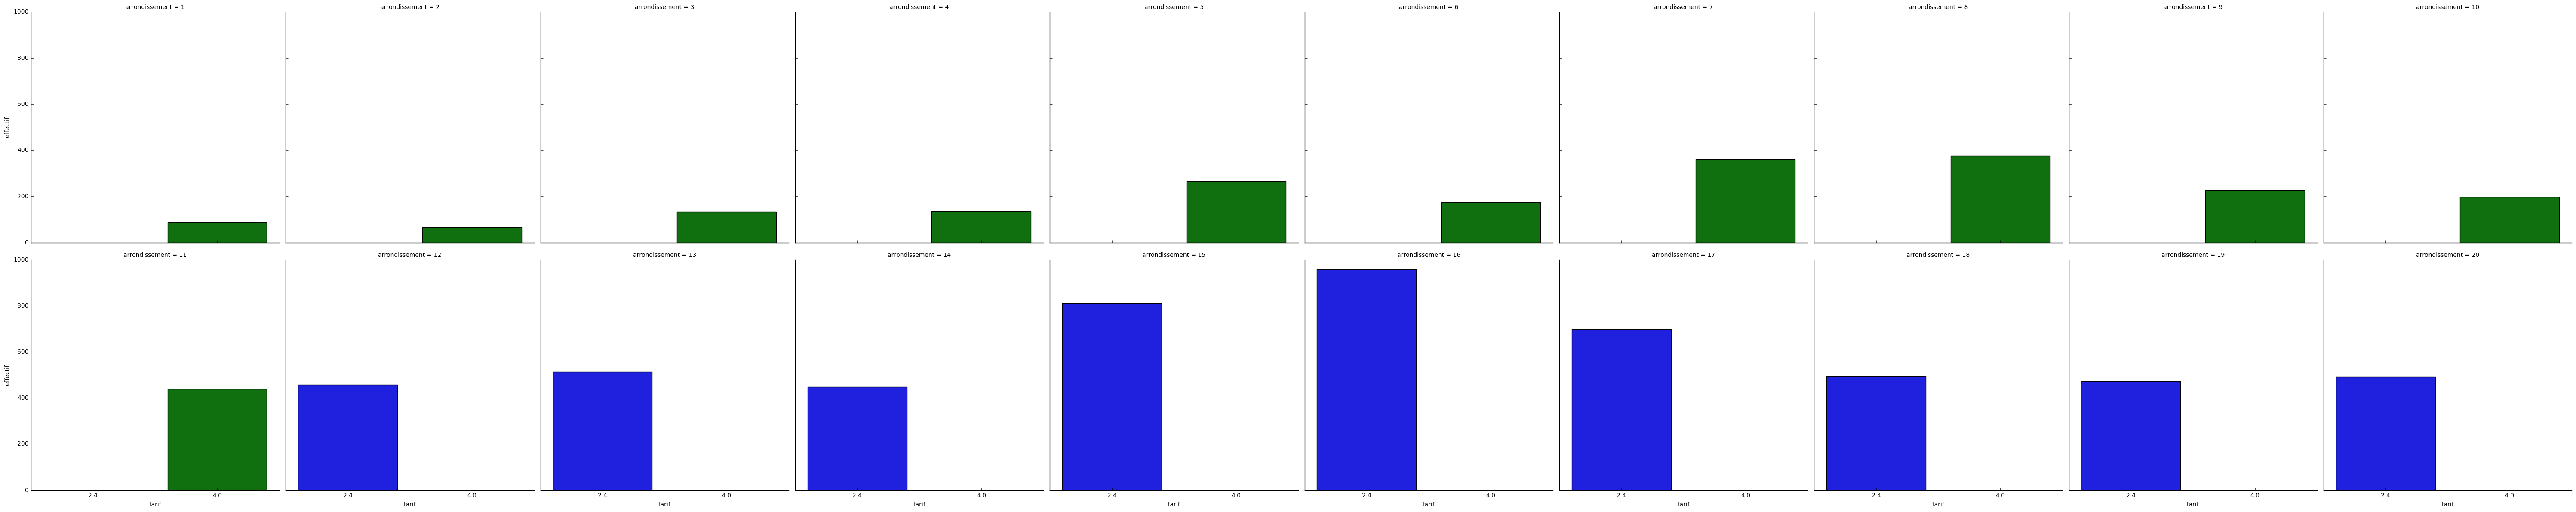

In [12]:
seaborn.factorplot(x = "tarif", y = "effectif",
                   col = "arrondissement", col_wrap = 10,
                   data = df, kind = "bar", size = 6)

[{'_id': 'ROT', 'nb': 1032}, {'_id': 'MIX', 'nb': 6778}]


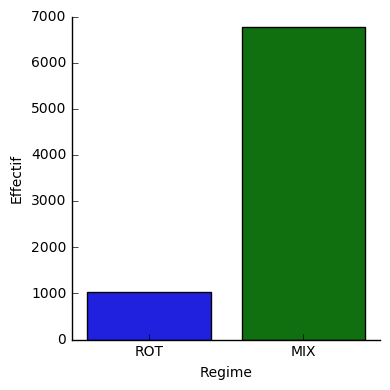

In [13]:
res = list(horo.mobiliers.aggregate([
{ "$group" : { "_id" : "$fields.regime", "nb" : { "$sum" : 1}}}
]))
pprint(res)
# Creation d'un Tableau type dataframe contenant le type de regime des horodateurs avec leurs effectifs 
df = pandas.DataFrame(res)
df.columns = ["Regime", "Effectif"]
df
# On a donc 2 types de regime: ROT et MIX
# 1032 horodateurs utilisent le regime ROT et les 6778 autres utilisent le regime MIX
# representation graphiques de la diference entre les 2 regimes et les effectifs
seaborn.factorplot(x = "Regime", y = "Effectif", data = df, kind = "bar")

# Le nombre horodateurs pour chaque arrondissement

[{'_id': 1, 'nb': 87},
 {'_id': 6, 'nb': 174},
 {'_id': 3, 'nb': 133},
 {'_id': 11, 'nb': 440},
 {'_id': 12, 'nb': 458},
 {'_id': 10, 'nb': 197},
 {'_id': 14, 'nb': 448},
 {'_id': 2, 'nb': 67},
 {'_id': 15, 'nb': 810},
 {'_id': 17, 'nb': 698},
 {'_id': 4, 'nb': 135},
 {'_id': 7, 'nb': 361},
 {'_id': 19, 'nb': 473},
 {'_id': 13, 'nb': 514},
 {'_id': 5, 'nb': 267},
 {'_id': 8, 'nb': 376},
 {'_id': 18, 'nb': 494},
 {'_id': 20, 'nb': 492},
 {'_id': 9, 'nb': 227},
 {'_id': 16, 'nb': 959}]


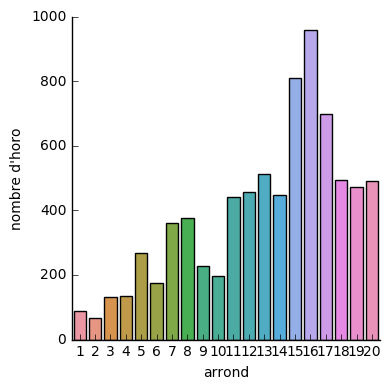

In [14]:
res = list(horo.mobiliers.aggregate([
{ "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1}}}
]))
pprint(res)
# Creation d'un dataframe contenant les 20 arrondisssement parisiens et le nombre d'horodateurs dans chacun 
df = pandas.DataFrame(res)
df.columns = ["arrond", "nombre d'horo"]
df
# On constate une repartition  hétérogene des horodateurs dans les  différents arrondissements
# le 16ème arrondissement à le plus d'horodateurs avec 959 alors
# que le 2ème arrondissement est le moins equipés avec seulement 67 horodateurs
#  Repartition des horodateurs dans les differents arrondissements
seaborn.factorplot(x = "arrond", y = "nombre d'horo", data = df, kind = "bar")

# Lien entre le moyen d’alimentation d’un horodateur et le lieu  ou il se situe

In [15]:
res = list(horo.mobiliers.aggregate([
    { "$lookup": {
       "from": "transactions_small",
       "localField": "fields.numhoro",
       "foreignField": "horodateur",
       "as": "transactions"
    }},
    { "$unwind" : "$transactions" },
     { "$limit" : 10000},
    { "$group" : { "_id" : { "modele" : "$fields.modele", "type" : "$fields.alim" }, "nb" : { "$sum" :1}}},
    { "$match" : { "_id.type" : {"$exists" : True }}}
]))          
df = pandas.DataFrame(res)
df = df.assign(
Modele = [a['modele'] for a in df._id],
Alimentation = [a['type'] for a in df._id]
).drop("_id", 1)
df
# Il existe  un lien entre le type d'alimentation et les modeles 
# les horodateurs qui utilisent un type d'alimentation au pile sont de modeles SMB2  
## ceux qui utilisent  un type solaire sont de types SAB3 


nb Alimentation Modele
0  4023         PILE   SMB2
1  5916      SOLAIRE   SAB3

Dans cette partie , on  explore la collection transactions_small à cause des données volumineuses de transactions.
 en listant les differents moyens de paiements, les dureés de stationnements, les differents montants payés ainsi que les diferents usagers.
On analyse ensuite le  lien entre le moyen de paiement et la durée de paiement, entre le moyen de paiement
et le montant payé .

# Les moyens de paiements


In [16]:
res = list(horo.transactions.aggregate([
{ "$group" : { "_id" : "$moyen de paiement", "nb" : { "$sum" : 1}}},
{ "$sort" : { "nb" : -1 }}
]))
df=pandas.DataFrame(res)
df
# Il y'a  deux moyens de paiements: paiements par Paris carte et par CB
# On constate aussi que le paiement par Paris carte est en peu plus elevé que ceux de CB

_id        nb
0  Paris Carte  13181015
1           CB  11267015

# Les temps de stationnements 

In [17]:
res = list(horo.transactions_small.find({}, {"_id": 0, "durée payée (h)" : 1}))
res
df=pandas.DataFrame(res)
df.head()
#  Les temps de stationnements sont entre 25 minutes et 2 heures 

durée payée (h)
0             1.00
1             2.00
2             0.25
3             1.75
4             2.00

# Les montants  payés

In [18]:
res = list(horo.transactions_small.find({}, {"_id": 0, "montant carte" : 1}))
res
df=pandas.DataFrame(res)
df.head()
#  Les montants payés varient de  0.30 a 7.20 euros
# Elles varient certainements en fonction des temps de stationnements

montant carte
0            1.2
1            4.8
2            0.6
3            6.3
4            4.8

# Les usagers


In [19]:
res = list(horo.transactions.aggregate([
{ "$group" : { "_id" : "$usager", "nb" : { "$sum" : 1}}},
{ "$sort" : { "nb" : -1 }}
]))
df=pandas.DataFrame(res)
df
# On a  les residents et les rotatifs
# Ceux dans les residences  ou se trouvent les parkings et ceux qui y viennent travailler, 
#  les rotatifs sont à peu près  4 fois plus nombreux que les residents .

_id        nb
0   Rotatif  19033897
1  Résident   5414133

# Les moyens de paiements et les montants payés en fonction des temps de stationnements

In [20]:
res = list(horo.transactions_small.aggregate([
{ "$group" : { "_id" : "$moyen de paiement", "durée" : { "$avg" : "$durée payée (h)"}}},
{ "$sort" : { "nb" : -1 }}
]))
df=pandas.DataFrame(res)
df
# Il n'ya pas de correspondance entre le paiement par cb ou par paris carte  et le montant payé

_id     durée
0           CB  8.254365
1  Paris Carte  8.261151

# Les montants payés et les moyens de paiements

In [21]:
res = list(horo.transactions_small.aggregate([
{ "$group" : { "_id" : "$moyen de paiement", "montant" : { "$avg" : "$montant carte"}}},
{ "$sort" : { "nb" : -1 }}
]))
df=pandas.DataFrame(res)
df
# les personnes payant  en CB payent  0.5 euros de plus que ceux qui payent par Paris carte 

_id   montant
0           CB  3.007229
1  Paris Carte  2.161537

# La distribution des montants payés (montant carte) et des durées payées (durée payée (h))

In [22]:
res = list(horo.transactions_small.find({}, {"_id": 0, "montant carte" : 1}))

In [23]:
df = pandas.DataFrame(res)

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


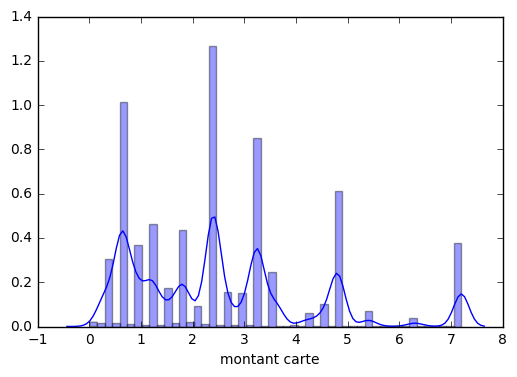

In [24]:
seaborn.distplot(df["montant carte"])

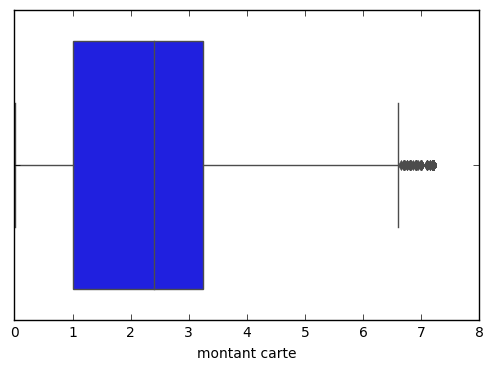

In [25]:
seaborn.boxplot(x = "montant carte", data = df)

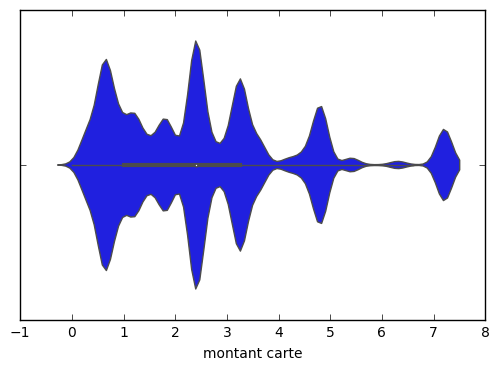

In [26]:
seaborn.violinplot(x = "montant carte", data = df)

# Les transactions par arrondissement

[{'_id': 6, 'nb': 20},
 {'_id': 3, 'nb': 36},
 {'_id': 11, 'nb': 168},
 {'_id': 12, 'nb': 115},
 {'_id': 10, 'nb': 248},
 {'_id': 14, 'nb': 141},
 {'_id': 15, 'nb': 306},
 {'_id': 17, 'nb': 261},
 {'_id': 4, 'nb': 43},
 {'_id': 19, 'nb': 260},
 {'_id': 13, 'nb': 328},
 {'_id': 5, 'nb': 164},
 {'_id': 8, 'nb': 116},
 {'_id': 18, 'nb': 176},
 {'_id': 20, 'nb': 211},
 {'_id': 9, 'nb': 123},
 {'_id': 16, 'nb': 425}]


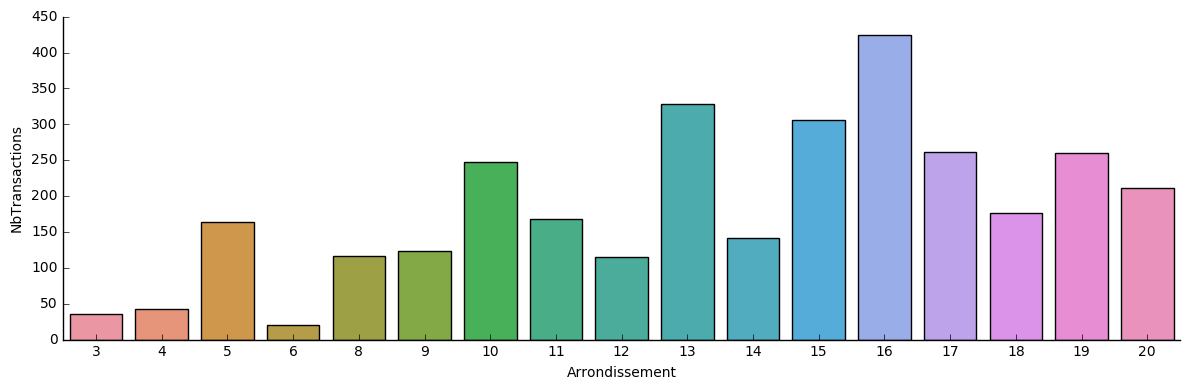

In [27]:
res = list(horo.mobiliers.aggregate([
     { "$limit" : 100 },
    { "$lookup": {
       "from": "transactions_small",
       "localField": "fields.numhoro",
       "foreignField": "horodateur",
       "as": "transactions"
    }},
    { "$project" : { "Arrondissement" : "$fields.arrondt", "Nb" : { "$size" : "$transactions" }, "_id" : 12}},
    { "$group" : { "_id" : "$Arrondissement", "nb" : { "$sum" : "$Nb" }}}
]))
pprint(res)



# Dataframe contenant le nombre de transactions et l'arrondissement correspondant
df = pandas.DataFrame(res)
df.columns = [ "Arrondissement", "NbTransactions"]
df
# Graphique de la difference entre le nombre de transactions dans les differents arrondissements
seaborn.factorplot(x = "Arrondissement", y = "NbTransactions",data = df, kind = "bar", size = 4,aspect=3)

# Les montants moyens des transactions par arrondissement


[{'_id': 6, 'nb': 3.3600000000000003},
 {'_id': 3, 'nb': 4.4},
 {'_id': 11, 'nb': 3.1922619047619043},
 {'_id': 12, 'nb': 2.072608695652174},
 {'_id': 10, 'nb': 2.9465725806451615},
 {'_id': 14, 'nb': 2.419929078014184},
 {'_id': 15, 'nb': 1.7954901960784313},
 {'_id': 17, 'nb': 2.5928352490421456},
 {'_id': 4, 'nb': 2.9779069767441864},
 {'_id': 19, 'nb': 1.685769230769231},
 {'_id': 13, 'nb': 2.066585365853659},
 {'_id': 5, 'nb': 3.6404878048780485},
 {'_id': 8, 'nb': 3.1073275862068965},
 {'_id': 18, 'nb': 2.4302272727272727},
 {'_id': 20, 'nb': 1.717298578199052},
 {'_id': 9, 'nb': 3.4964227642276424},
 {'_id': 16, 'nb': 2.132329411764706}]


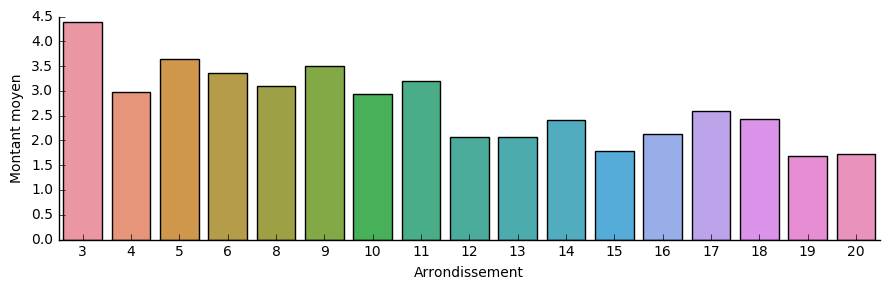

In [28]:
res = list(horo.mobiliers.aggregate([
     { "$limit" : 100 },
    { "$lookup": {
       "from": "transactions_small",
       "localField": "fields.numhoro",
       "foreignField": "horodateur",
 
       "as": "transactions"
    }},
    { "$unwind" : "$transactions" },
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$avg" : "$transactions.montant carte" }}}
]))
pprint(res)
# Creation d'un dataframe contenant le montant moyen et l'arrondissement correspondant
df = pandas.DataFrame(res)
df.columns = [ "Arrondissement", "Montant moyen"]
df
# Graphique explicitant la difference entre le nombre de transactions dans les differents arrondissements
seaborn.factorplot(x = "Arrondissement", y = "Montant moyen",data = df, kind = "bar", size = 3, aspect=3)


# Les transactions au cours de l’année

[{'_id': 4, 'nb': 59838.76},
 {'_id': 3, 'nb': 59477.59},
 {'_id': 10, 'nb': 65347.0},
 {'_id': 12, 'nb': 42352.3},
 {'_id': 2, 'nb': 55430.3},
 {'_id': 7, 'nb': 57701.55},
 {'_id': 1, 'nb': 60657.02},
 {'_id': 6, 'nb': 42031.38},
 {'_id': 11, 'nb': 54322.52},
 {'_id': 8, 'nb': 7782.58},
 {'_id': 5, 'nb': 55117.26},
 {'_id': 9, 'nb': 63134.73}]


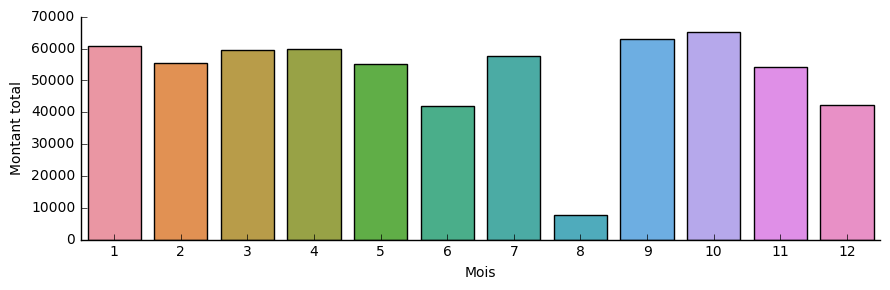

In [29]:
start = datetime(2014,1,1,0,0,0)
end = datetime(2015,1,1,0,0,0)
res = list(horo.transactions_small.aggregate([
    { "$match": {"date horodateur": {"$gte": start, "$lt": end}}},
    { "$project" : { "Date" : "$date horodateur", "Nb" : "$montant carte", "_id" : 0}},
    { "$group" : { "_id" : { "$month" : "$Date" }, "nb" : { "$sum" : "$Nb" }}}
]))
pprint(res)
# Creation d'un dataframe contenant les mois et le montant total correspondant
df = pandas.DataFrame(res)
df.columns = ["Mois", "Montant total"]
df
# graphique ulustrant l'evolution des transactions au cours de l'année
seaborn.factorplot(x = "Mois", y = "Montant total",data = df, kind = "bar", size = 3, aspect = 3)


# Par horodateur Montant total des transactions au cours de l’année

In [30]:
res = list(horo.transactions_small.aggregate([
   { "$limit" : 100 },
   { "$group" : { "_id" : {"mob" : "$horodateur" , "month" : {"$month" : "$date horodateur"}} ,"nb" : { "$sum" : "$montant carte"}}},
   { "$project" : { "Horodateur" : "$_id.mob", "Mois" : "$_id.month" , "Montant total" : "$nb"}}
]))
pprint(res)
# Creation d'un tableau de type dataframe  contenant l'evolution du montant de chaque horodateur
df = pandas.DataFrame(res).drop("_id", 1)
df


[{'Horodateur': 44630302,
  'Mois': 10,
  'Montant total': 2.4,
  '_id': {'mob': 44630302, 'month': 10}},
 {'Horodateur': 69181404,
  'Mois': 1,
  'Montant total': 2.4,
  '_id': {'mob': 69181404, 'month': 1}},
 {'Horodateur': 59851001,
  'Mois': 7,
  'Montant total': 0.65,
  '_id': {'mob': 59851001, 'month': 7}},
 {'Horodateur': 80410301,
  'Mois': 10,
  'Montant total': 0.65,
  '_id': {'mob': 80410301, 'month': 10}},
 {'Horodateur': 91911501,
  'Mois': 1,
  'Montant total': 7.2,
  '_id': {'mob': 91911501, 'month': 1}},
 {'Horodateur': 86941301,
  'Mois': 12,
  'Montant total': 1.8,
  '_id': {'mob': 86941301, 'month': 12}},
 {'Horodateur': 47630701,
  'Mois': 12,
  'Montant total': 0.6,
  '_id': {'mob': 47630701, 'month': 12}},
 {'Horodateur': 72810501,
  'Mois': 5,
  'Montant total': 7.2,
  '_id': {'mob': 72810501, 'month': 5}},
 {'Horodateur': 6390904,
  'Mois': 7,
  'Montant total': 2.4,
  '_id': {'mob': 6390904, 'month': 7}},
 {'Horodateur': 69181404,
  'Mois': 10,
  'Montant total

Horodateur  Mois  Montant total
0     44630302    10           2.40
1     69181404     1           2.40
2     59851001     7           0.65
3     80410301    10           0.65
4     91911501     1           7.20
5     86941301    12           1.80
6     47630701    12           0.60
7     72810501     5           7.20
8      6390904     7           2.40
9     69181404    10           2.40
10    59030203     4           7.20
11    40060201     4           2.40
12    75360101     9           2.40
13    57630101    11           3.25
14    81840105    11           3.25
15    62860106    10           3.25
16    42180105     7           1.80
17    12860103    12           4.80
18    68320101     9           0.60
19    51940201    11           1.80
20    34651206     1           2.40
21    57660501     3           2.40
22    25630301     1           3.00
23    38730902     2           4.80
24    36250802     4           3.25
25    20780202     9           0.90
26    95880602    11           3.25
27    81540202    11           2.40
28    41530104     2           4.80
29    17410204     5           0.60
..         ...   ...            ...
70    61050101    10           2.40
71    44340102     6           7.20
72    63870504     2           2.40
73    34870604     3           3.25
74    34720110     5           2.40
75    96230705     1           0.60
76     8331901     5           2.40
77    76441201     6           3.25
78    18870404     1           1.80
79    49300501    10           1.20
80    99331301     1           1.20
81    86880201    12           3.25
82    52491301     4           0.65
83     9600402     4           3.25
84     8810102    11           2.40
85    56860601     1           7.20
86    93300204     2           4.80
87    61780201     7           2.70
88    92020602     9           4.80
89    28210302     1           0.30
90    84920306     2           1.80
91    62860304     1           0.90
92    96280505     1           0.60
93    16360302     3           0.60
94    81840105    12           2.40
95    54350302     1           0.30
96    21160101    11           4.80
97    14540503    10           2.40
98    86351603     6           2.70
99    86990302     4           4.80

[100 rows x 3 columns]

# Modele d’horodateur par arrondissement

[{'Arrondissement': 1,
  'Effectif': 1,
  'Modele': 'MUI',
  '_id': {'Modele': 'MUI', 'arr': 1}},
 {'Arrondissement': 1,
  'Effectif': 86,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB3', 'arr': 1}},
 {'Arrondissement': 2,
  'Effectif': 134,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB3', 'arr': 2}},
 {'Arrondissement': 3,
  'Effectif': 399,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB3', 'arr': 3}},
 {'Arrondissement': 4,
  'Effectif': 540,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB3', 'arr': 4}},
 {'Arrondissement': 5,
  'Effectif': 170,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB3', 'arr': 5}},
 {'Arrondissement': 5,
  'Effectif': 1165,
  'Modele': 'SMB2',
  '_id': {'Modele': 'SMB2', 'arr': 5}},
 {'Arrondissement': 6,
  'Effectif': 342,
  'Modele': 'SMB2',
  '_id': {'Modele': 'SMB2', 'arr': 6}},
 {'Arrondissement': 6,
  'Effectif': 702,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB3', 'arr': 6}},
 {'Arrondissement': 7,
  'Effectif': 315,
  'Modele': 'SAB3',
  '_id': {'Modele': 'SAB

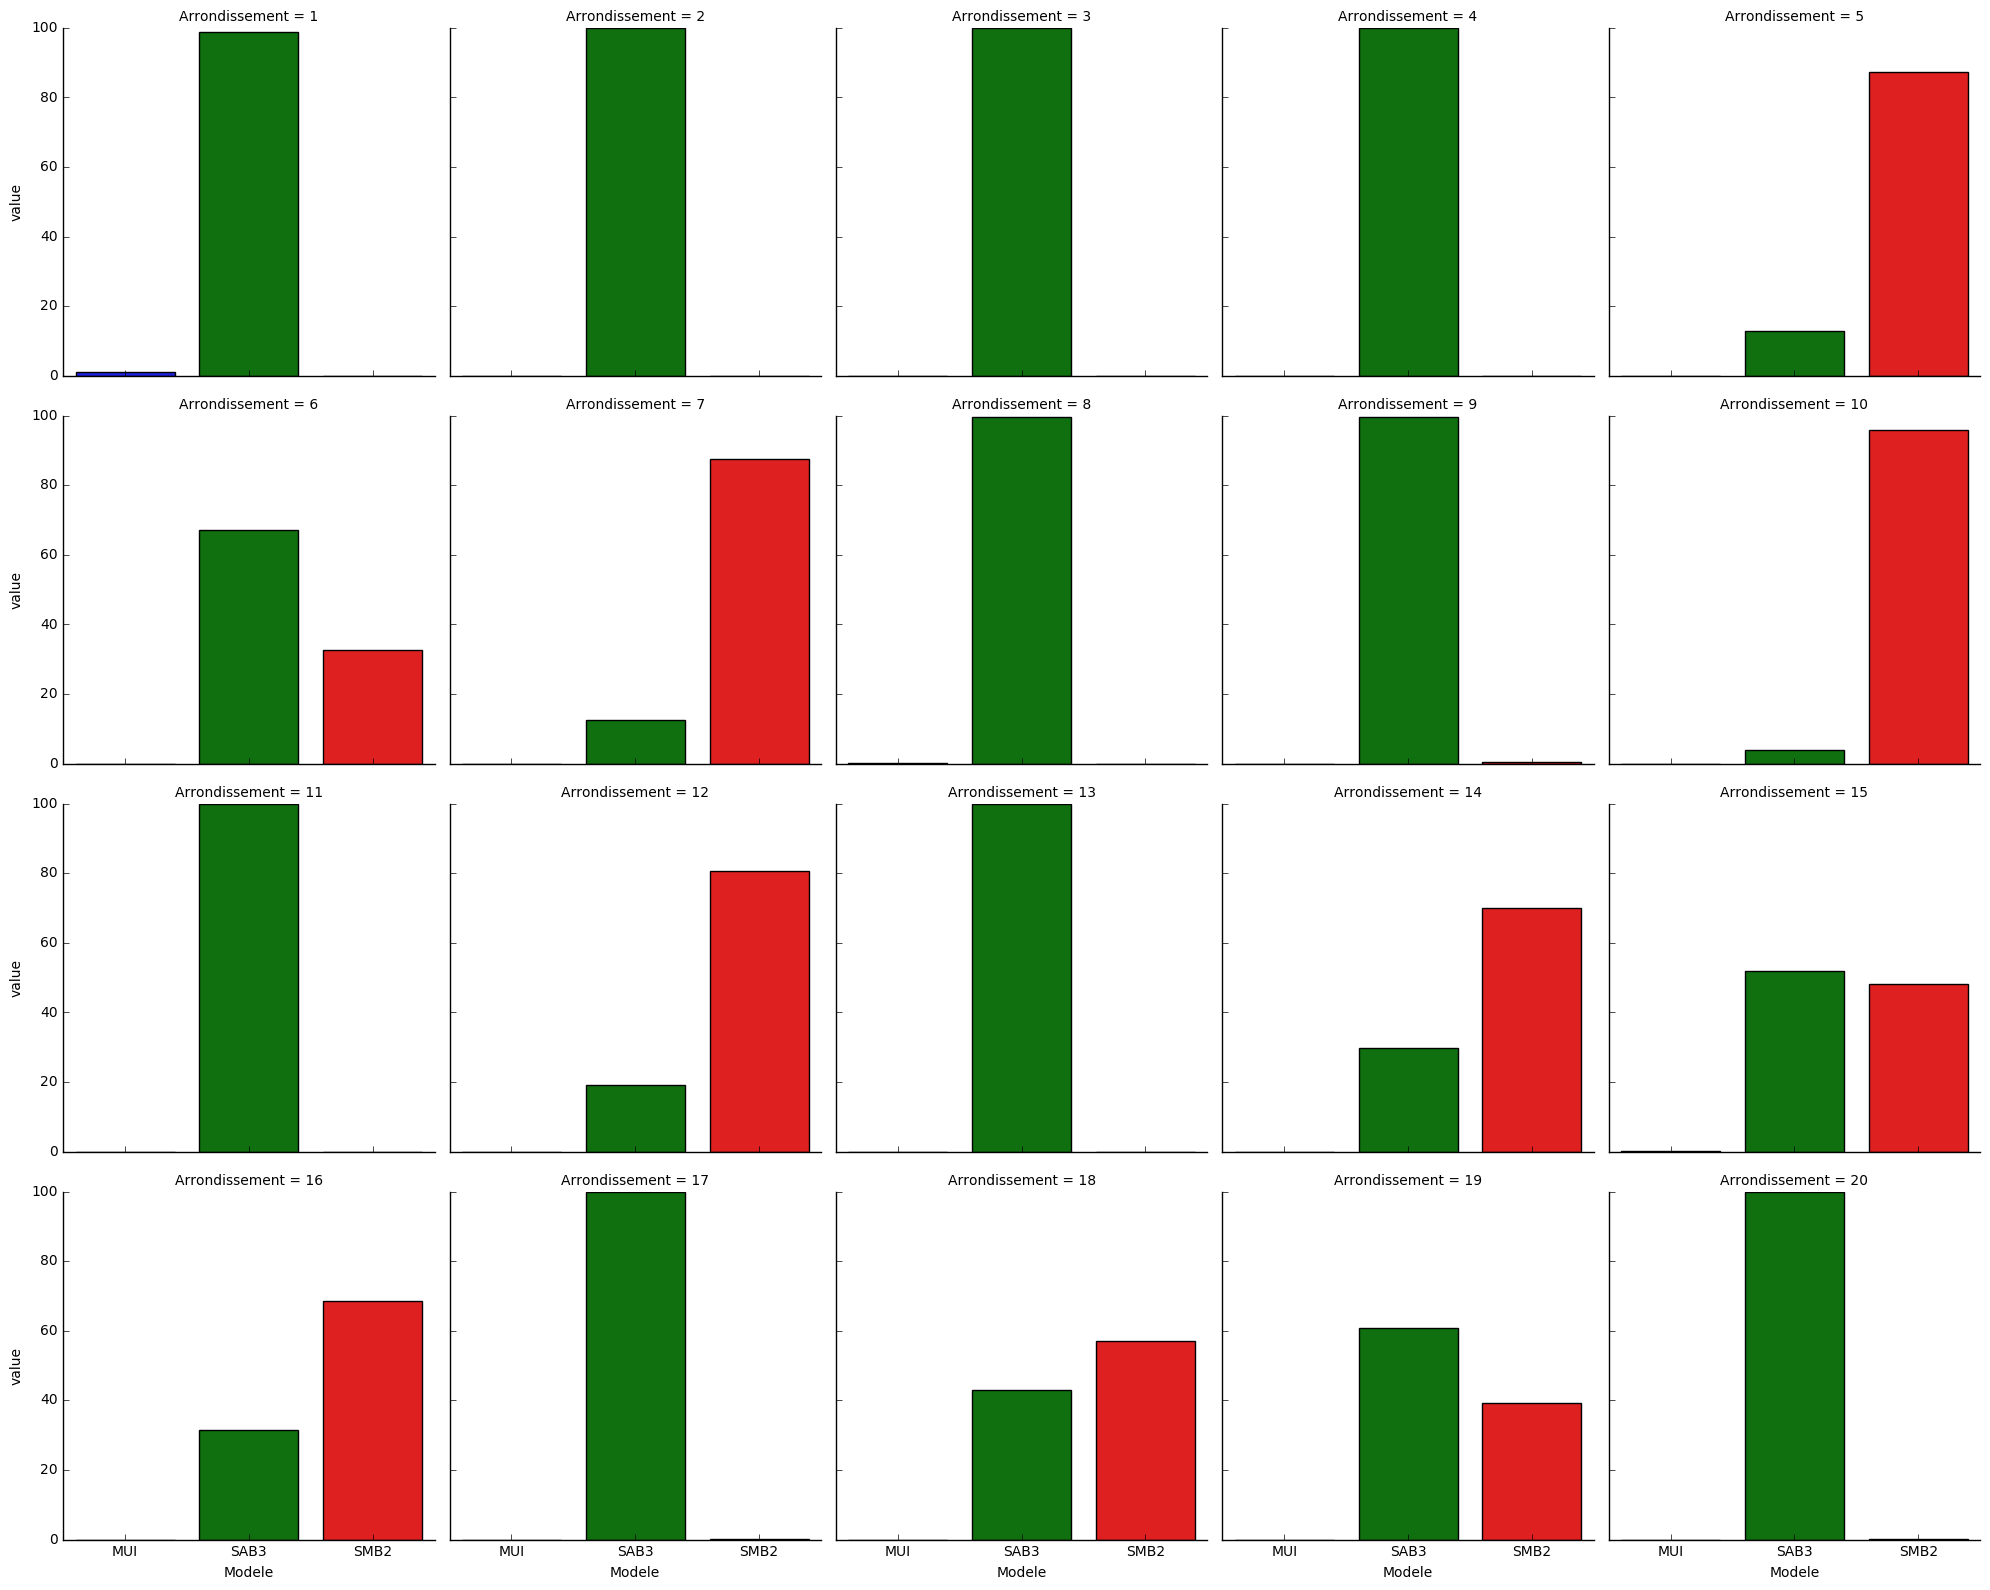

In [31]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "Modele" : "$fields.modele", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : "$fields.arrondt"}}},
    { "$project": { "Modele" : "$_id.Modele", "Arrondissement" : "$_id.arr", "Effectif" : "$nb" }},
    { "$sort" : { "Arrondissement" : 1}}
]))
pprint(res)
# Creation d'un dataframe contenant les arrondissements, les modeles et le nombre de modeles pour chaque arrondissement
df = pandas.DataFrame(res).drop("_id", 1)
df
# graphique ulistrant cette repartition
t = pandas.crosstab(df.Modele, df.Arrondissement, df.Effectif, normalize = "columns", aggfunc = sum)
t = t.assign(Modele = t.index)
tm = pandas.melt(t, id_vars = "Modele")
tm = tm.assign(value = 100 * tm.value)
seaborn.factorplot(x = "Modele", y = "value",col = "Arrondissement", col_wrap = 5, data = tm, kind = "bar") 


# Répartition des alimentations par arrondissement


[{'Alimentation': 'SOLAIRE',
  'Arrondissement': 1,
  'Effectif': 85,
  '_id': {'alim': 'SOLAIRE', 'arr': 1}},
 {'Arrondissement': 1, 'Effectif': 2, '_id': {'arr': 1}},
 {'Alimentation': 'SOLAIRE',
  'Arrondissement': 2,
  'Effectif': 67,
  '_id': {'alim': 'SOLAIRE', 'arr': 2}},
 {'Alimentation': 'SOLAIRE',
  'Arrondissement': 3,
  'Effectif': 133,
  '_id': {'alim': 'SOLAIRE', 'arr': 3}},
 {'Alimentation': 'SOLAIRE',
  'Arrondissement': 4,
  'Effectif': 135,
  '_id': {'alim': 'SOLAIRE', 'arr': 4}},
 {'Alimentation': 'SOLAIRE',
  'Arrondissement': 5,
  'Effectif': 34,
  '_id': {'alim': 'SOLAIRE', 'arr': 5}},
 {'Alimentation': 'PILE',
  'Arrondissement': 5,
  'Effectif': 233,
  '_id': {'alim': 'PILE', 'arr': 5}},
 {'Alimentation': 'PILE',
  'Arrondissement': 6,
  'Effectif': 57,
  '_id': {'alim': 'PILE', 'arr': 6}},
 {'Alimentation': 'SOLAIRE',
  'Arrondissement': 6,
  'Effectif': 117,
  '_id': {'alim': 'SOLAIRE', 'arr': 6}},
 {'Alimentation': 'SOLAIRE',
  'Arrondissement': 7,
  'Effecti

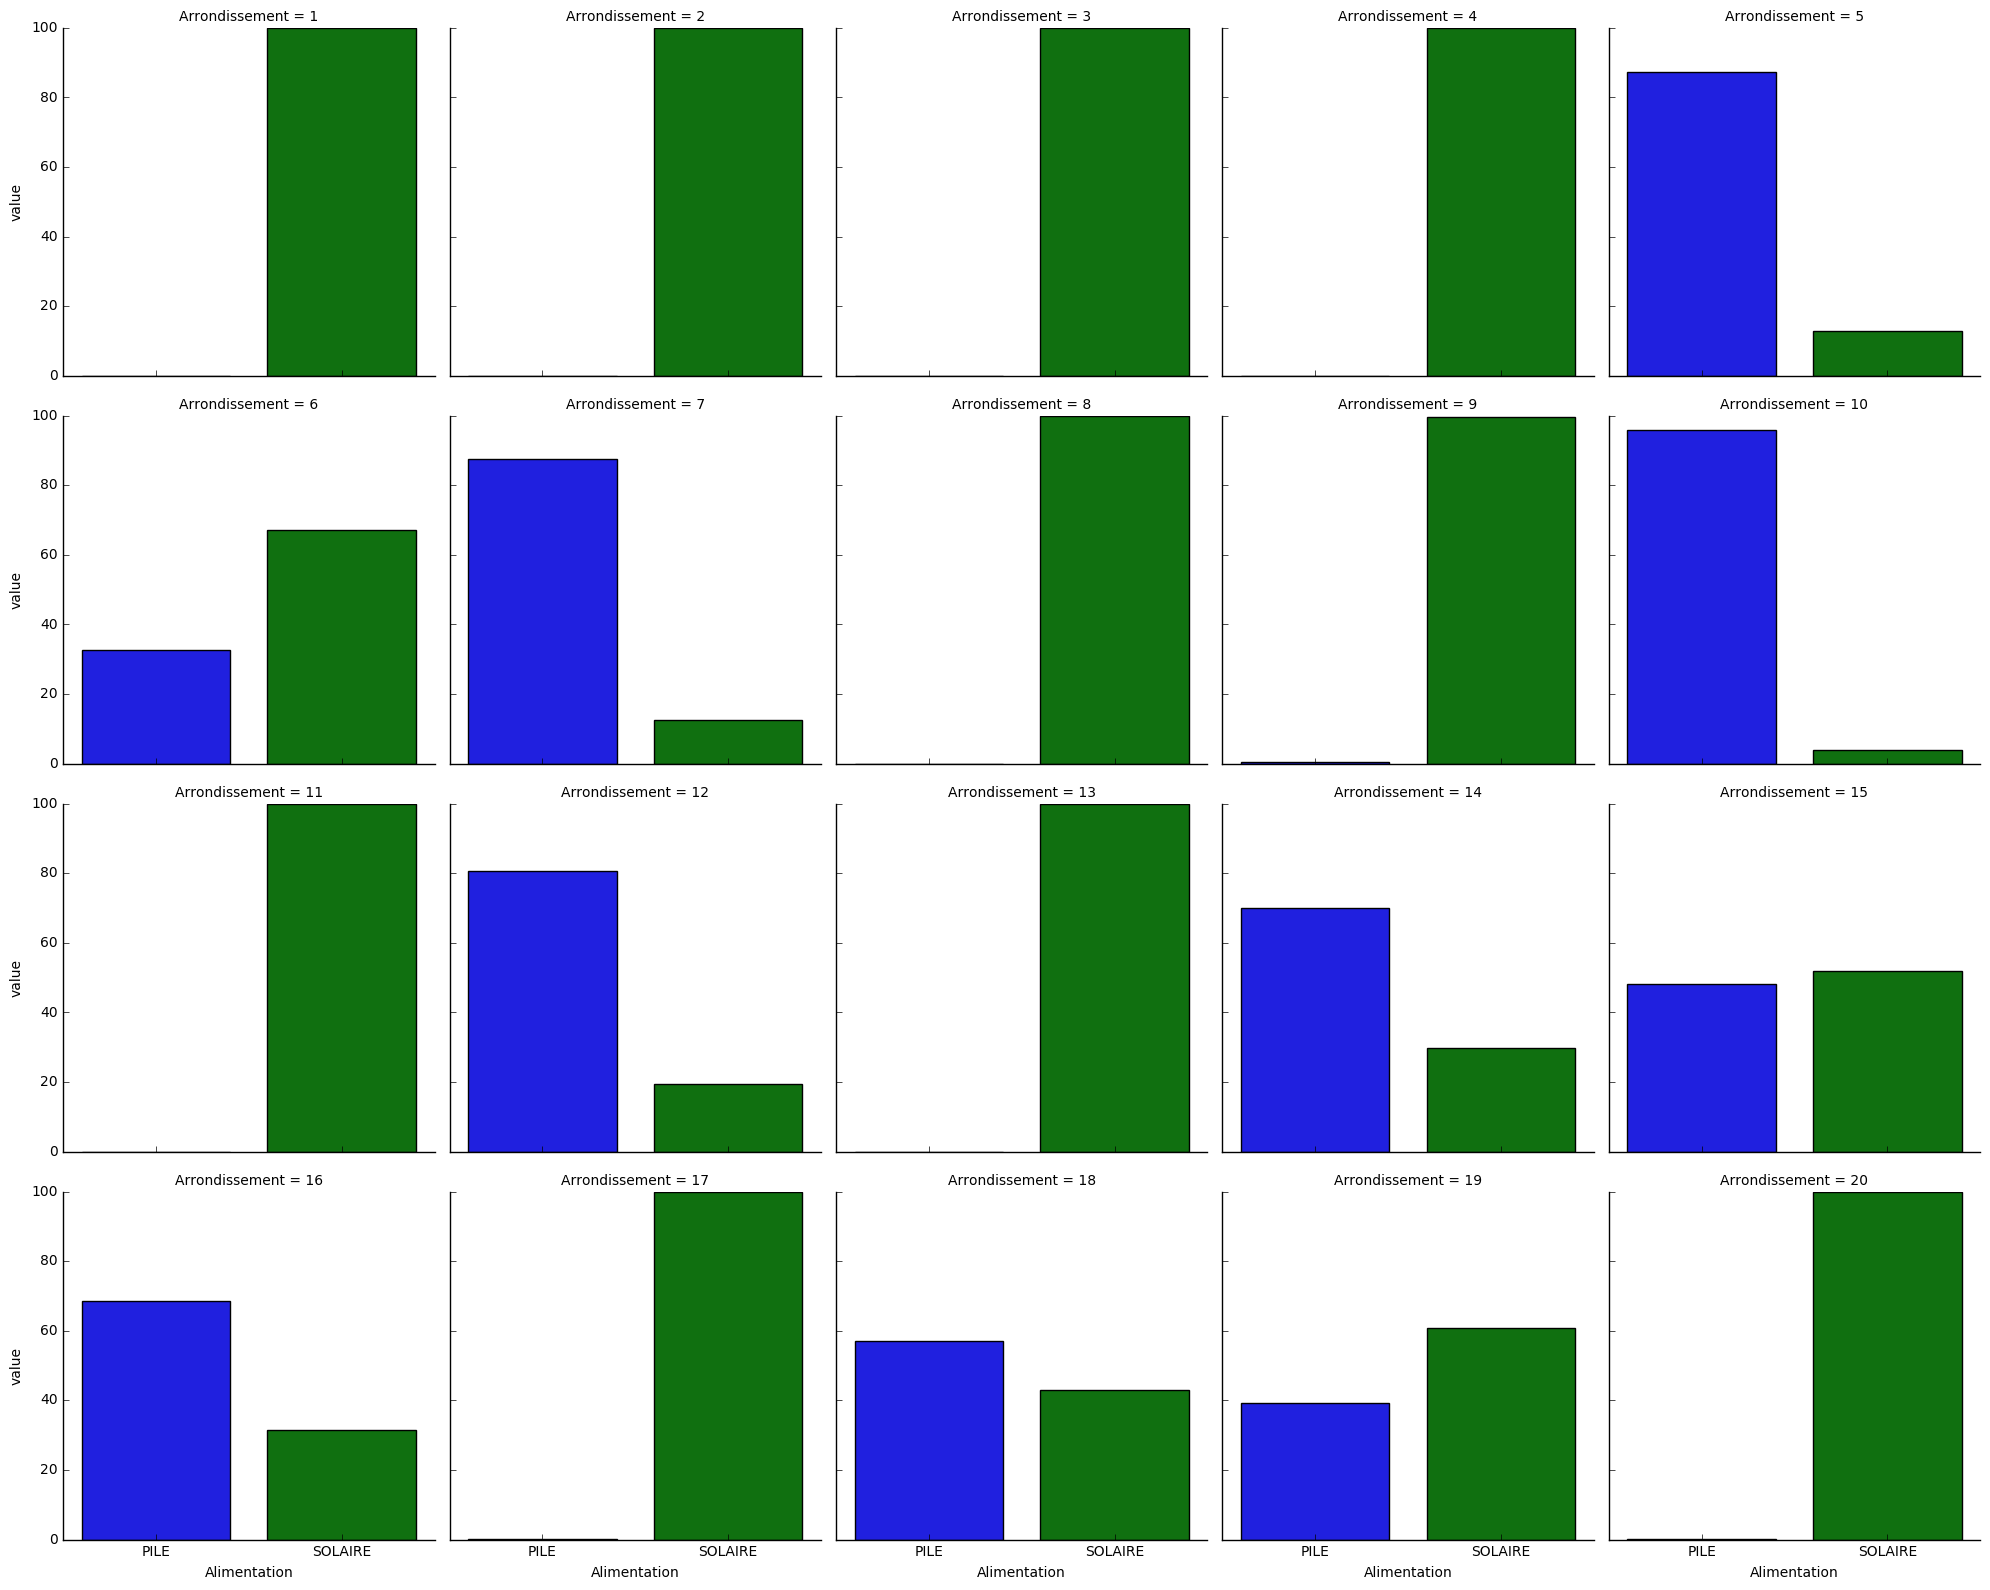

In [32]:
res = list(horo.mobiliers.aggregate([
{ "$group" : { "_id" : { "alim" : "$fields.alim", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
{ "$project": { "Alimentation" : "$_id.alim", "Arrondissement" : "$_id.arr", "Effectif" : "$nb" }},
{ "$sort" : { "Arrondissement" : 1}}
]))
pprint(res)
#Tableau contenant les differents types d'alimentations se trouvant dans chaque arrondissement 
df = pandas.DataFrame(res).drop("_id", 1)
df
# Visualisation de  cette repartion
t = pandas.crosstab(df.Alimentation, df.Arrondissement, df.Effectif, normalize = "columns", aggfunc = sum)
t = t.assign(Alimentation = t.index)
tm = pandas.melt(t, id_vars = "Alimentation")
tm = tm.assign(value = 100 * tm.value)
seaborn.factorplot(x = "Alimentation", y = "value", col = "Arrondissement", col_wrap = 5, data = tm, kind ="bar")
#  Forte Présence  de l'alimentation solaire beaucoup plus 
## que la présence de l'alimentation pile dans la plupart des arrondissements

# Cartes Maps pour les emplacements

In [34]:
## Dans cette partie on créee des cartes maps correspondant aux différents emplacements
# Carte maps de Paris
# Geojson

import folium 
with open('/users/master/ii12540/Bureau/paris-arrondissements.geojson', 'r') as content_file:
    geo = content_file.read()


centre = [48.86, 2.35]

carte = folium.Map(location = centre, zoom_start = 12)

carte.choropleth(geo_data = geo)
carte




# Nombre de transactions par arrondissement avec dataframe et carte

In [35]:
# Nombre de transactions par arrondissement avec dataframe et carte

res = list(horo.mobiliers.aggregate([
  { "$limit" : 100 },
   { "$lookup": {
      "from": "transactions_small",
      "localField": "fields.numhoro",
      "foreignField": "horodateur",
      "as": "transactions"
   }},

   { "$unwind" : "$transactions" },
   { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$avg" : "$transactions.montant carte" }}}
]))
df = pandas.DataFrame(res)
df.columns = [ "Arrondissement", "Montant moyen"]
df.columns = [ "Arrondissement", "Montant moyen"]
df = df.sort_values(by = "Arrondissement").reset_index()
paris = folium.Map(location = [48.86, 2.35], zoom_start = 12)
paris.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = df, columns = ["Arrondissement", "Montant moyen"],
                 fill_color = 'YlGn')
paris


Dans le sous-module decomposition, nous allons importer la fonction PCA(). 

 On créé d'abord un objet (nommé ici pca) qui va contenir le résultat de l'ACP. 
 Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l'objet précédemment créé. 
  Dans cette fonction, nous devons donc passer les données à utiliser.

Si l'on souhaite une ACP normée, il nous faut standardiser les données en amont, avec la fonction scale() du sous-module preprocessing (importée aussi ici). Bien évidemment, il ne faut passer que des variables quantitatives.

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
res = list(horo.transactions_small.aggregate([
   { "$limit" : 100 },
   { "$group" : { "_id" : {"mob" : "$horodateur" , "month" : {"$month" : "$date horodateur"}} ,"nb" : { "$sum" : "$montant carte"}}},
   { "$project" : { "Horodateur" : "$_id.mob", "Mois" : "$_id.month" , "Montant total" : "$nb"}}
]))
pprint(res)
# Creation d'un tableau de type dataframe  contenant l'evolution du montant de chaque horodateur
df = pandas.DataFrame(res).drop("_id", 1)
pca = PCA()
pca.fit(scale(df[df.columns[:4]]))


[{'Horodateur': 44630302,
  'Mois': 10,
  'Montant total': 2.4,
  '_id': {'mob': 44630302, 'month': 10}},
 {'Horodateur': 69181404,
  'Mois': 1,
  'Montant total': 2.4,
  '_id': {'mob': 69181404, 'month': 1}},
 {'Horodateur': 59851001,
  'Mois': 7,
  'Montant total': 0.65,
  '_id': {'mob': 59851001, 'month': 7}},
 {'Horodateur': 80410301,
  'Mois': 10,
  'Montant total': 0.65,
  '_id': {'mob': 80410301, 'month': 10}},
 {'Horodateur': 91911501,
  'Mois': 1,
  'Montant total': 7.2,
  '_id': {'mob': 91911501, 'month': 1}},
 {'Horodateur': 86941301,
  'Mois': 12,
  'Montant total': 1.8,
  '_id': {'mob': 86941301, 'month': 12}},
 {'Horodateur': 47630701,
  'Mois': 12,
  'Montant total': 0.6,
  '_id': {'mob': 47630701, 'month': 12}},
 {'Horodateur': 72810501,
  'Mois': 5,
  'Montant total': 7.2,
  '_id': {'mob': 72810501, 'month': 5}},
 {'Horodateur': 6390904,
  'Mois': 7,
  'Montant total': 2.4,
  '_id': {'mob': 6390904, 'month': 7}},
 {'Horodateur': 69181404,
  'Mois': 10,
  'Montant total

PCA(copy=True, n_components=None, whiten=False)

# Utilisation de  DBSCAN pour le regroupement dans des classes

Il s'agit d'un algorithme de classification non supervisée, basé sur la densité. Il est intéressant car il ne nécessite pas de connaître le nombre de classes, mais une estimation de la densité (globale) des données. En effet, les points proches (distance inférieure à ε) sont consiédérés dans la même classe. Si toutefois cette classe comporte au moins un certain nombre de points au final. Si ce n'est pas le cas, les points sont considérés comme outliers et mis à part.

Les classes dont contenues dans l'objet labels_ de db. On a pour chaque individu sa classe (de 0 à K−1 pour K classes obtenues). Les outliers sont étiquettés −1 .



In [40]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = .6, min_samples = 3)
db.fit(scale(df[df.columns[:4]])) 



db.labels_






array([ 0,  2,  5,  1, -1,  0, -1, -1,  2,  0, -1,  2,  0,  0,  0,  0,  2,
       -1,  1,  0,  2,  2,  2,  3,  2,  6,  0,  0,  3,  4, -1, -1, -1, -1,
        1,  2,  2,  0,  2,  2,  3,  2,  2,  2,  0,  2,  0, -1,  5,  5, -1,
        5,  4,  0,  0,  6,  0, -1,  2,  2,  5,  6,  6,  2,  2, -1, -1,  2,
        0,  0,  0, -1,  2,  2,  2,  7,  2, -1,  2,  0,  7,  0,  5,  2, -1,
       -1, -1, -1, -1, -1, -1,  5,  7,  4,  0,  5, -1, -1, -1, -1])

# Tableau récapitulatif des effectifs par classes

In [41]:
eff = numpy.unique(db.labels_, return_counts = True)
pandas.DataFrame({
    "Classe" : eff[0],
    "Effectif" : eff[1]
})

Classe  Effectif
0      -1        27
1       0        22
2       1         3
3       2        27
4       3         3
5       4         3
6       5         8
7       6         4
8       7         3

# Conclusion 

A l'issue de notre analyse on a exploré des pistes intéressantes et il vient donc que la visualisation , les tableaux de types dataframe offrent des perspectives intéressantes dans le cadre des projets de  données massives et les modules comme matplotlib , seaborn du langage  python sont des puissants outils pour obtenir des résultats clairs et satisfaisants pour des analyses statistiques  .
Par ailleurs les conclusions interessantes de ce projet  sont les suivantes :

 L'heterogenité de la repartition des modèles d'horodateurs dans chaque arrondissement .
 Les transactions sont les plus elevés au  mois d'Octobre .
 Les transactions sont les moins elevés au mois d'Aout .
 La moyenne la plus elevée des transactions sont réalisées dans le 3eme arrondissement
 La moyenne la plus faible sont réalisées dans le 19eme arrondissement .
 Le nombre de transactions est assez héterogene d'un arrondissement a un autre .
 
 